<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/43_Image_FFT_Zajsz%C5%B1r%C3%A9se.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tartalom

Zajszűrés Fast Fourier Transzformáció segítségével 1 Dimenziós adatokon.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Create a simple signal with two frequencies

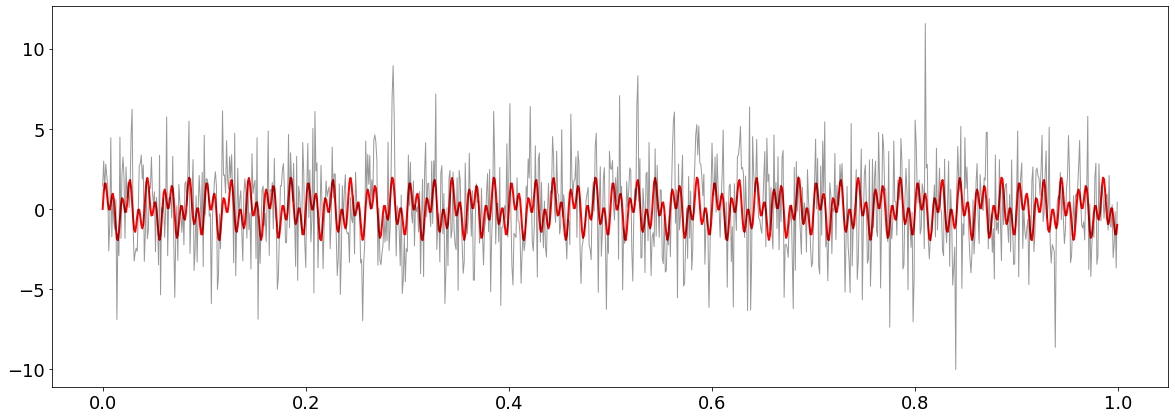

In [47]:
step = 0.001

time = np.arange(0,1,step)
wave = np.sin(2*np.pi*50*time) + np.sin(2*np.pi*120*time)
noisy_wave = wave + 2.5*np.random.randn(len(time))

plt.figure(figsize=(20, 7))
plt.plot(time, wave, color='red', lw=2)
plt.plot(time, noisy_wave, color='black', lw=1, alpha=0.4)
plt.show()

## Compute the Fast Fourier Transform (FFT)

In [48]:
n = len(time)
y = np.fft.fft(noisy_wave,n)               # Compute the FFT
PSD = y * np.conj(y) / n                   # Power spectrum (power per freq)
freq = (1/(step*n)) * np.arange(n)         # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

## Use the PSD to filter out noise

In [49]:
index = PSD > 100           # Find all freqs with large power
PSDclean = PSD * index      # Zero out all others
masked = index * y          # Zero out small Fourier coeffs. in Y
filtered = np.fft.ifft(masked) # Inverse FFT for filtered time signal

## Plots

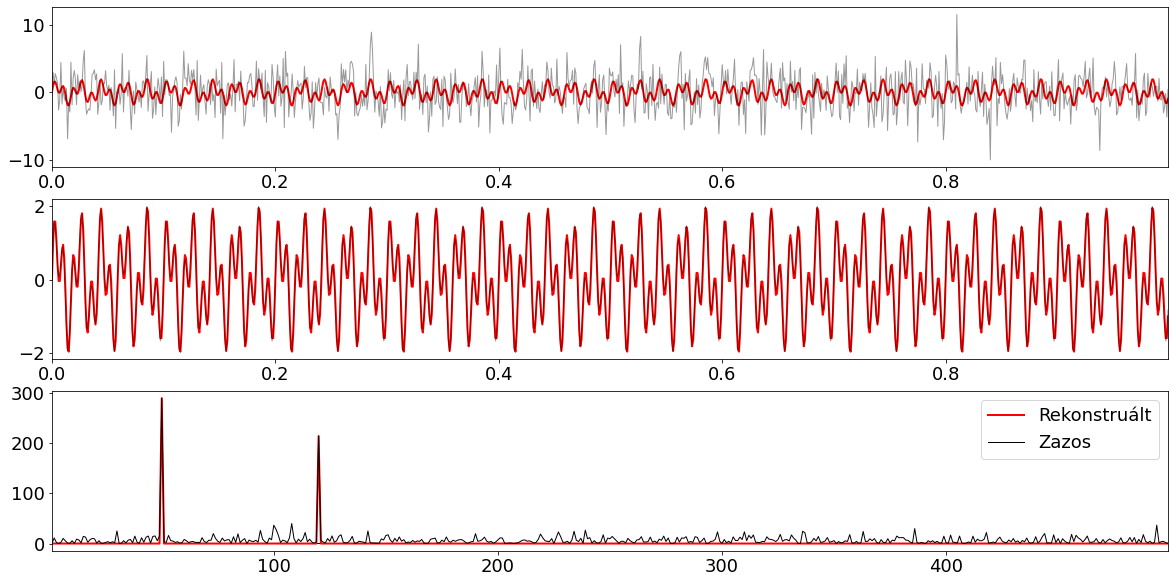

In [50]:
fig,axs = plt.subplots(3,1, figsize=(20, 10))

plt.sca(axs[0])
plt.plot(time, wave, color='red', lw=2)
plt.plot(time, noisy_wave, color='black', lw=1, alpha=0.4)
plt.xlim(time[0],time[-1])

plt.sca(axs[1])
plt.plot(time, wave, color='red', lw=2)
plt.plot(time, filtered, color='black', lw=1, alpha=0.4)
plt.xlim(time[0],time[-1])

plt.sca(axs[2])
plt.plot(freq[L],PSDclean[L], color='red', lw=2, label='Rekonstruált')
plt.plot(freq[L],PSD[L], color='black', lw=1, alpha=1, label='Zazos')
plt.hlines(freq[L[0]], freq[L[-1]], 100, lw=1)
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()